In [4]:
from black_scholes_monte_carlo import Simulator
import yfinance as yf
import numpy as np
import pandas as pd

In [13]:

import yfinance as yf
import datetime

# Define ticker and date range
ticker = 'ETH-USD'
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=5*365)

# Download historical ETH data
eth_data = yf.download(ticker, start=start_date, end=end_date)

# Preview the data
print(eth_data.head())

# Save to CSV (optional)
eth_data.to_csv("eth_5yr_data.csv")

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ETH-USD']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, ETH-USD), (Close, ETH-USD), (High, ETH-USD), (Low, ETH-USD), (Open, ETH-USD), (Volume, ETH-USD)]
Index: []


In [50]:
# close_data = eth_data['Close']['ETH-USD']

# initial_price = close_data['2025-04-24']
# price_data = close_data.values
# price_data
sim = Simulator(0,0,0,1)
# data = sim.get_security_data('ETH-USD', start='2020-04-24', end='2025-04-24')
data = pd.read_csv("data/Ethereum Historical Results Price Data.csv")
to_float  = lambda x: float(x.replace(',', ''))
data['Open'] = data['Open'].apply(to_float)
data['Returns'] = np.log(data['Open'] / data['Open'].shift(1))
data = data.dropna()

sim.data = data
initial_price = data['Open'].iloc[-1]


In [51]:
sim.set_initial_price(initial_price)

In [52]:
# data[data['Returns'].isna()]
data

,Date,Price,Open,High,Low,Vol.,Change %,Returns
1,18/05/2025,"2,498.97",2475.04,"2,585.12","2,340.94",905.26K,0.97%,-0.009550
2,17/05/2025,"2,475.04",2537.14,"2,537.14","2,449.57",566.93K,-2.44%,0.024781
3,16/05/2025,"2,537.04",2545.46,"2,646.74","2,531.45",680.35K,-0.44%,0.003274
4,15/05/2025,"2,548.16",2610.78,"2,644.57","2,480.73",862.28K,-2.36%,0.025338
5,14/05/2025,"2,609.68",2680.04,"2,719.25","2,549.01",928.09K,-2.63%,0.026183
...,...,...,...,...,...,...,...,...
1579,21/01/2021,"1,117.33",1377.63,"1,387.39","1,095.26",2.76M,-18.89%,0.208814
1580,20/01/2021,"1,377.53",1372.00,"1,406.56","1,237.27",3.05M,0.40%,-0.004095
1581,19/01/2021,"1,372.00",1258.10,"1,437.42","1,252.36",2.27M,9.06%,-0.086667
1582,18/01/2021,"1,258.06",1233.93,"1,260.30","1,184.15",1.73M,2.06%,-0.019398


In [53]:
data['Returns'].isna().sum()

np.int64(0)

In [54]:
model = sim.markov_switching_model(data, num_regimes=2)

c:\Users\ab\Desktop\Durham\AFT\UNISWAP analysis\uniswap_analysis\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [55]:
year_sim = sim.markov_switching_monte_carlo(200,500,model)


c:\Users\ab\Desktop\Durham\AFT\UNISWAP analysis\uniswap_analysis\black_scholes_monte_carlo.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isnan(S[i, t-1]) or np.isnan(mu[reg]) or np.isnan(sigma[reg]):
c:\Users\ab\Desktop\Durham\AFT\UNISWAP analysis\uniswap_analysis\black_scholes_monte_carlo.py:112: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S[i, t] = S[i, t-1] * np.exp((mu[reg] - 0.5 * sigma[reg]**2) * dt + sigma[reg] * np.sqrt(dt) * z)


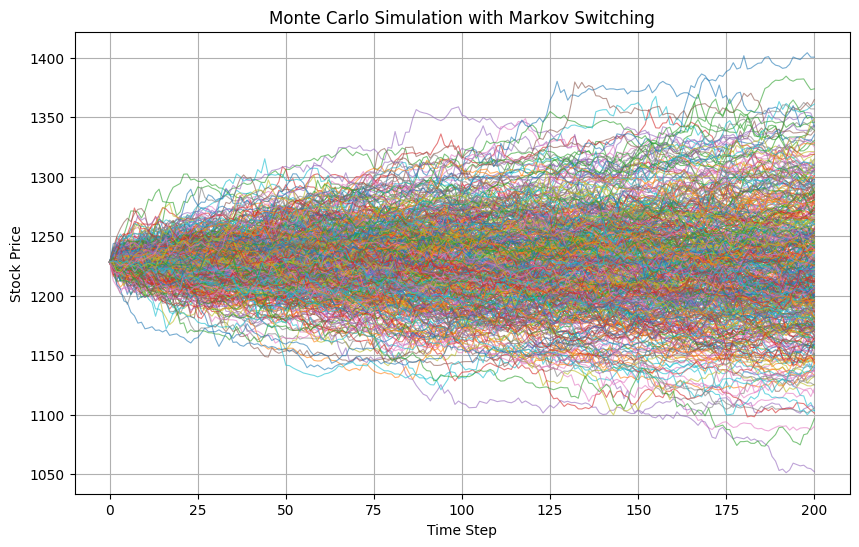

In [56]:
sim.plot_paths(year_sim)

In [57]:
optimal_range = sim.find_optimal_pool_range(year_sim)[:2]
apy = sim.estimate_apy_for_range(year_sim,optimal_range[0], optimal_range[1])
print(f"Optimal range 1 year: {optimal_range}")
print(f"optimal range apy: {apy}")

Optimal range 1 year: (np.float64(1042.9743034577962), np.float64(1411.082881148783))
optimal range apy: 6.027731175640227
